# 1.Pakcages & Data

In [ ]:
# 나눔고딕 다운
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

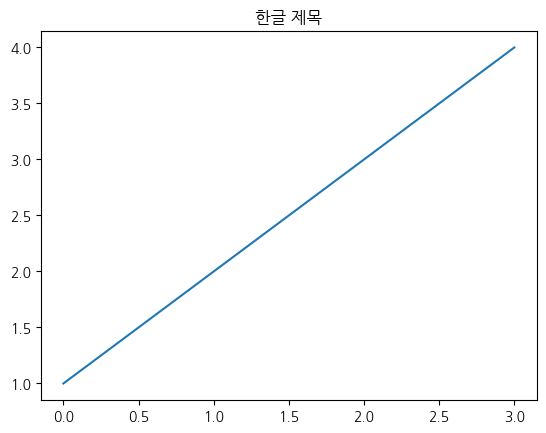

In [2]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# 나눔고딕 볼드체 폰트 경로
font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"

# 나눔고딕 볼드체 폰트 등록
font_manager.fontManager.addfont(font_path)
rc('font', family='NanumGothic')

# 시각화 코드
plt.plot([1, 2, 3, 4])
plt.title('한글 제목')
plt.show()

In [3]:
%cd /content/drive/MyDrive/Machine Learning project/Data

/content/drive/MyDrive/Machine Learning project/Data


In [4]:
!ls

1.premium.csv		       3.WA_Fn-UseC_-HR-Employee-Attrition.csv	6.amz_data.csv
2.accepted_2007_to_2018Q4.csv  4.Train.csv				7.uci-secom.csv
2.LCDataDictionary.xlsx        5.Market_Basket_Optimisation.csv


In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

# Plotly
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBClassifier
from sklearn.cluster import KMeans

from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, classification_report
from sklearn.feature_selection import RFE, SelectKBest, chi2
from sklearn.preprocessing import MinMaxScaler, StandardScaler, normalize
from sklearn.decomposition import PCA

import scipy.cluster.hierarchy as shc

from scipy.stats import pearsonr, chi2_contingency
from itertools import combinations

import warnings
warnings.filterwarnings('ignore')

In [6]:
train = pd.read_csv('4.Train.csv')
train.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


# 2.EDA

Meta Data
- ID : 고객 번호
- Warehouse block : 창고 구역
- Mode of shipment : 운송 수단
- Customer care calls : 고객 응답 횟수
- Customer rating : 고객 만족 점수
- Cost odf the product : 상품 비용
- Prior purchases : 이전 구매액
- Product importance : 상품 중요도
- Gender : 성별
- Discount offered : 할인액
- Weight in gms : 상품 무게
- Reached on time : 상품 정시 도착 여부 (0 : 정시 도착, 1 : 정시 불도착)

In [7]:
# 데이터의 모양 알아보기
train.shape

(10999, 12)

In [8]:
# 컬럼별 데이터 타입 알아보기
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [9]:
# 컬럼별 간단한 통계값 보기
train.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


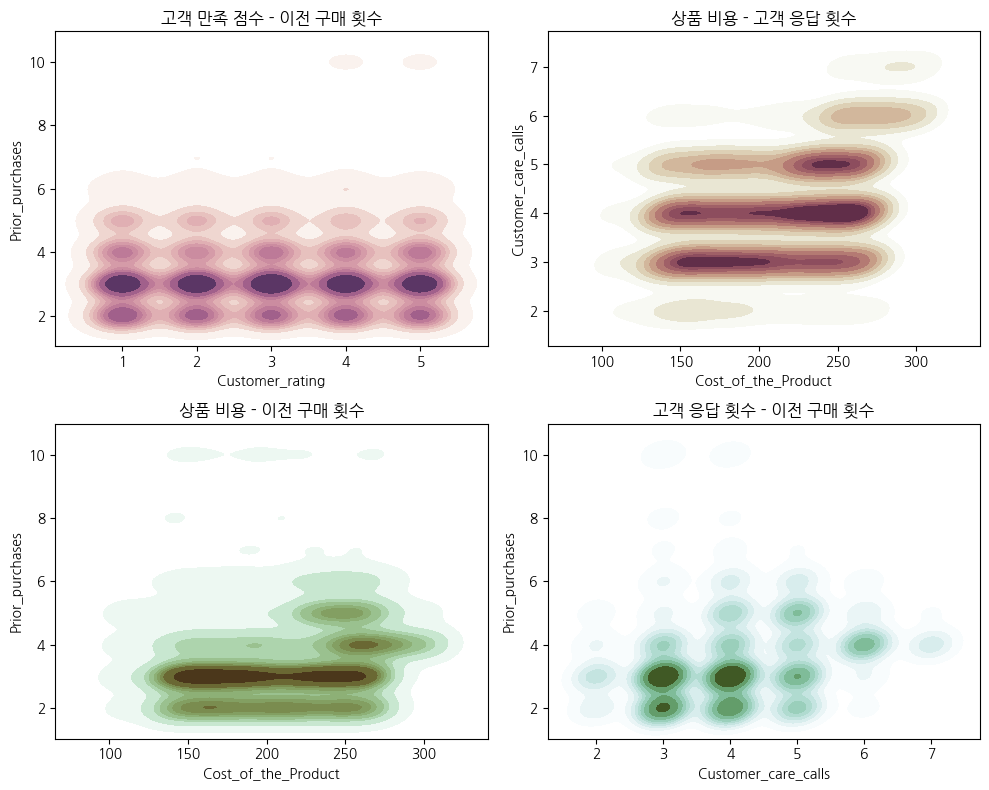

In [10]:
# 여러 개의 KDE Plot 생성 준비
f, axes = plt.subplots(2, 2, figsize=(10, 8),
                       sharex=False, sharey=False)

# Plot 색상 설정
s = np.linspace(0, 3, 10)

# 1-1
cmap = sns.cubehelix_palette(start=0.0, light=1, as_cmap=True)
x = train['Customer_rating']
y = train['Prior_purchases']
sns.kdeplot(x=x, y=y, cmap=cmap, shade=True, ax=axes[0,0])
axes[0,0].set( title = '고객 만족 점수 - 이전 구매 횟수')

# 1-2
cmap = sns.cubehelix_palette(start=0.333333333333, light=1, as_cmap=True)
x = train['Cost_of_the_Product']
y = train['Customer_care_calls']
sns.kdeplot(x=x, y=y, cmap=cmap, shade=True, ax=axes[0,1])
axes[0,1].set( title = '상품 비용 - 고객 응답 횟수')

# 2-1
cmap = sns.cubehelix_palette(start=1.0, light=1, as_cmap=True)
x = train['Cost_of_the_Product']
y = train['Prior_purchases']
sns.kdeplot(x=x, y=y, cmap=cmap, shade=True,  ax=axes[1,0])
axes[1,0].set( title = '상품 비용 - 이전 구매 횟수')

#2-2
cmap = sns.cubehelix_palette(start=1.333333333333, light=1, as_cmap=True)
x = train['Customer_care_calls']
y = train['Prior_purchases']
sns.kdeplot(x=x, y=y, cmap=cmap, shade=True,  ax=axes[1,1])
axes[1,1].set( title = '고객 응답 횟수 - 이전 구매 횟수')

f.tight_layout()

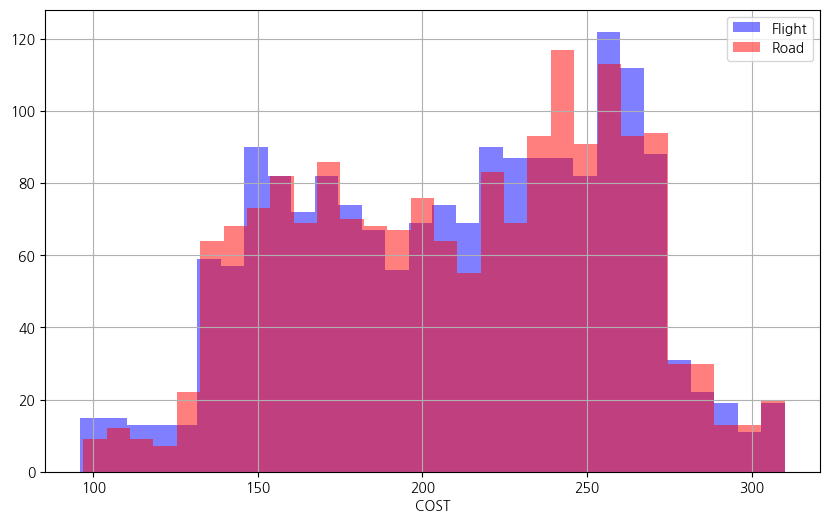

In [11]:
plt.figure(figsize=(10,6))
train[train['Mode_of_Shipment']=='Flight']['Cost_of_the_Product'].hist(alpha=0.5,color='blue',bins=30,label='Flight')
train[train['Mode_of_Shipment']=='Road']['Cost_of_the_Product'].hist(alpha=0.5,color='red',bins=30,label='Road')
plt.xlabel('COST')
plt.legend();

In [12]:
train.isnull().any()

ID                     False
Warehouse_block        False
Mode_of_Shipment       False
Customer_care_calls    False
Customer_rating        False
Cost_of_the_Product    False
Prior_purchases        False
Product_importance     False
Gender                 False
Discount_offered       False
Weight_in_gms          False
Reached.on.Time_Y.N    False
dtype: bool

In [13]:
# 중복된 항목 수 알아보기
print("중복된 항목 수 :", len(train[train.duplicated()]))

중복된 항목 수 : 0


In [14]:
# 목표 변수 명 변경
train = train.rename(columns = {"Reached.on.Time_Y.N":"Reached_on_Time_Y_N"})

In [15]:
train.groupby('Reached_on_Time_Y_N').mean()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms
Reached_on_Time_Y_N,,,,,,,
0,7090.479486,4.147656,2.967989,214.498647,3.670424,5.545987,4168.668395
1,4424.978364,3.991467,3.005790,207.289197,3.498095,18.663721,3272.640104


In [16]:
train.groupby('Reached_on_Time_Y_N').median()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms
Reached_on_Time_Y_N,,,,,,,
0,7096.0,4.0,3.0,222.0,3.0,6.0,4674.0
1,3467.0,4.0,3.0,209.0,3.0,9.0,3231.0


In [17]:
y = train['Reached_on_Time_Y_N'].copy()
y.value_counts()

1    6563
0    4436
Name: Reached_on_Time_Y_N, dtype: int64

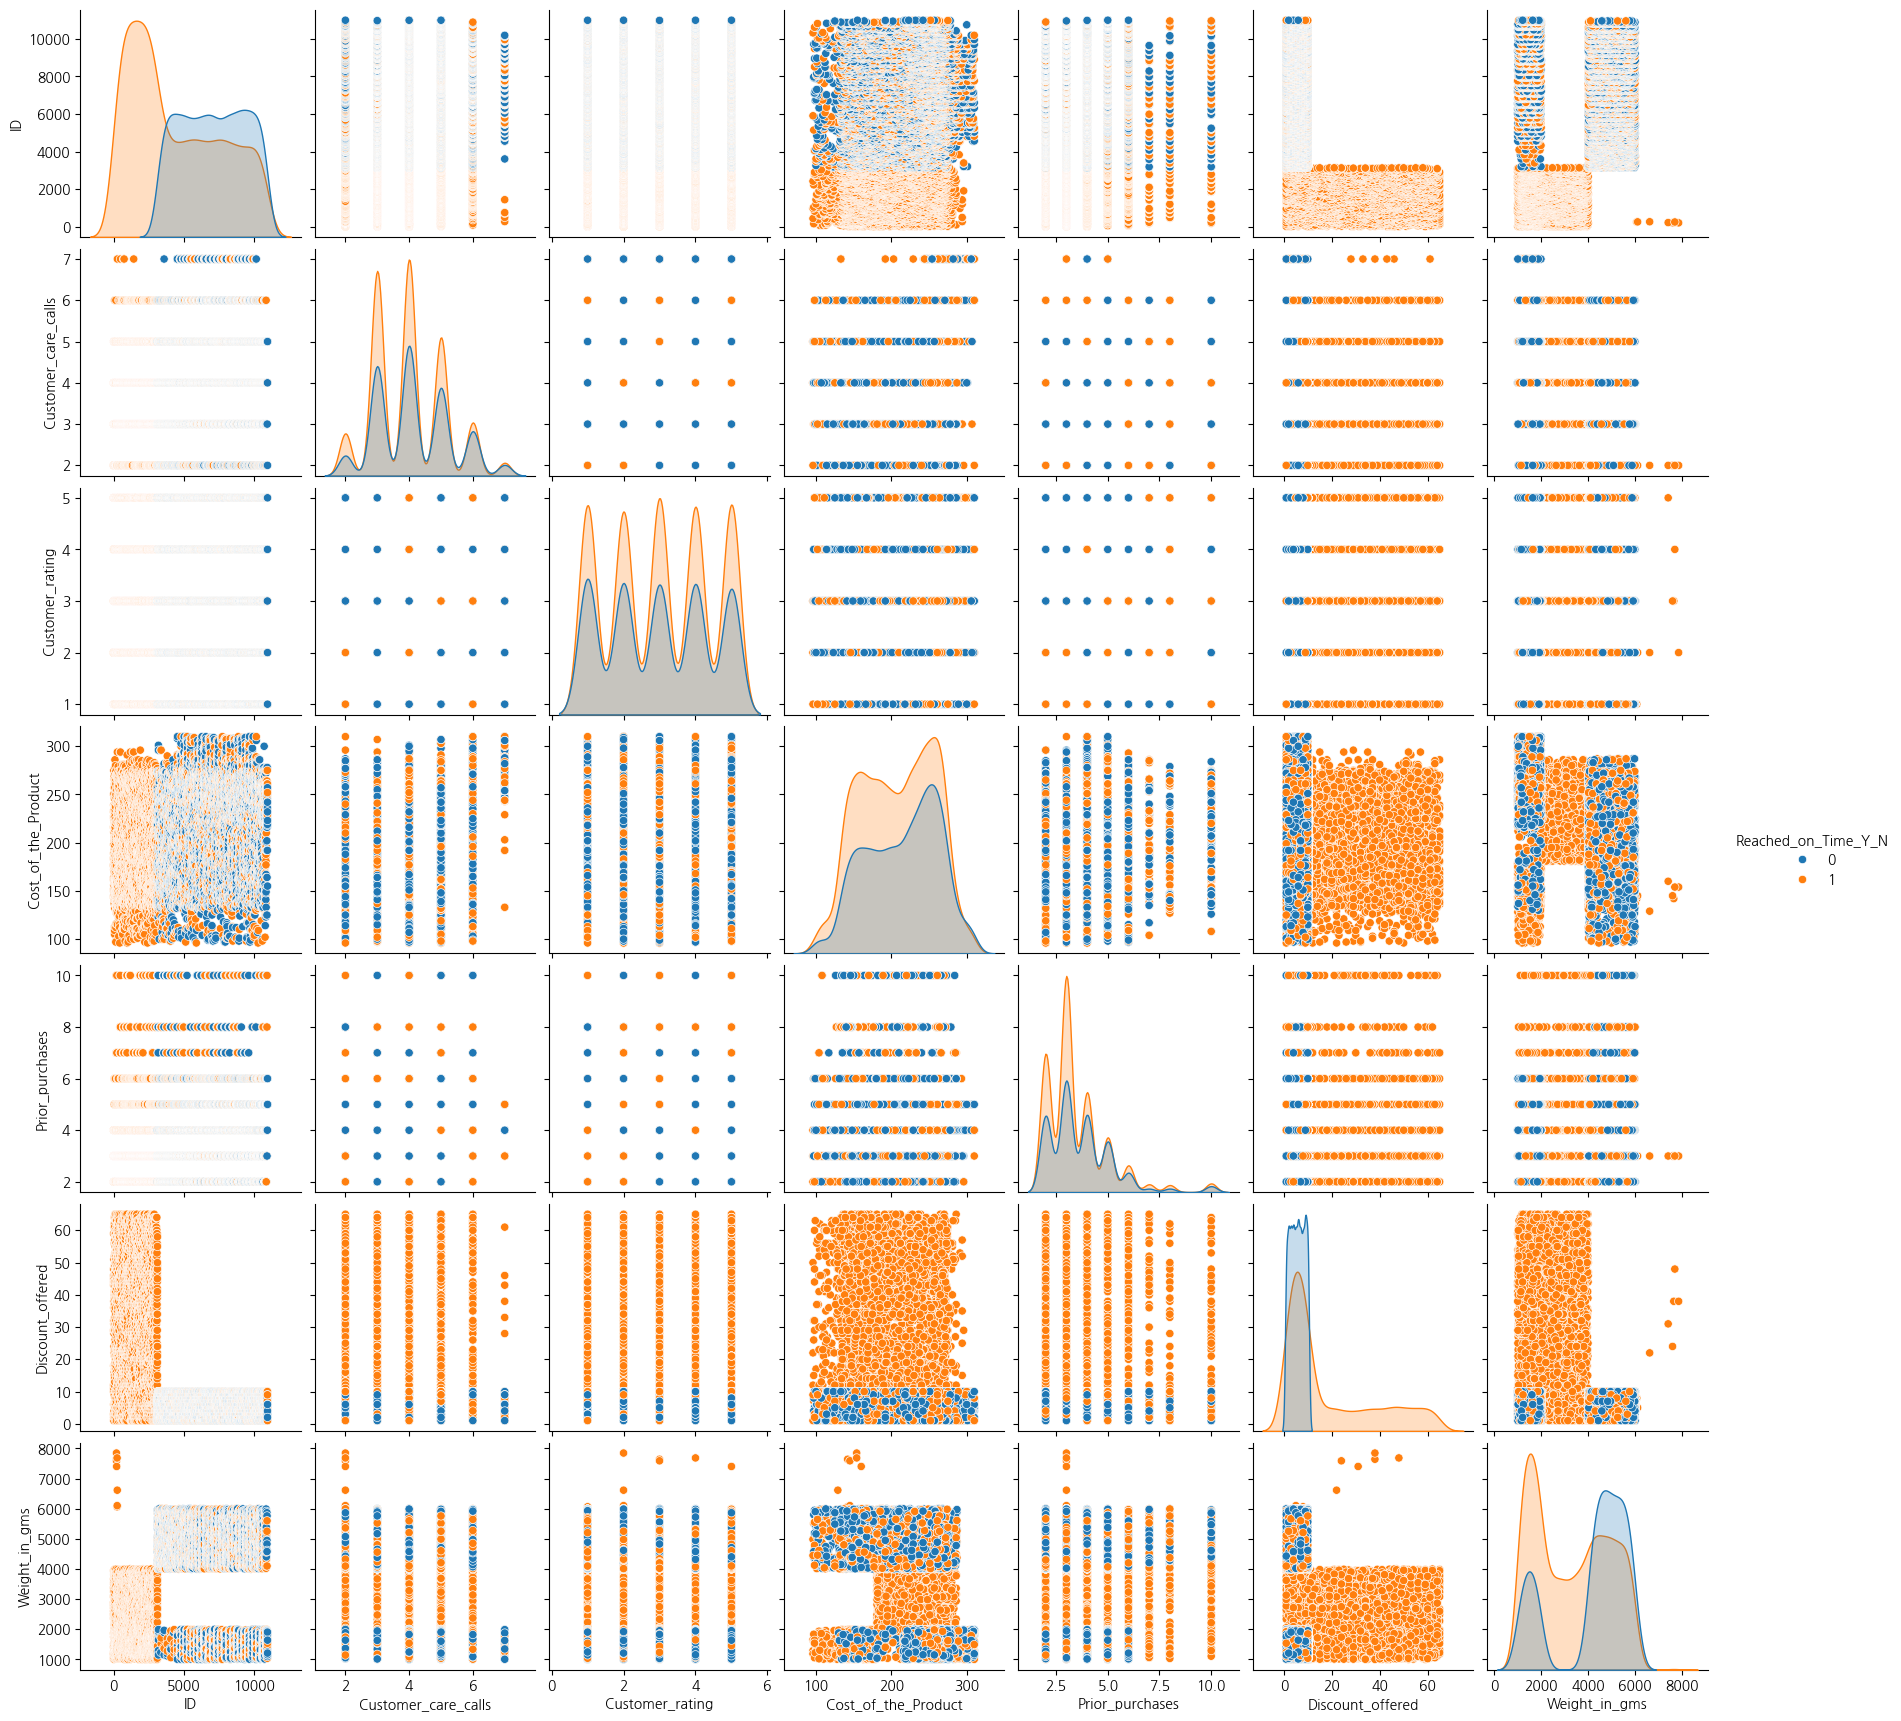

In [18]:
hue = 'Reached_on_Time_Y_N'
sns.pairplot(train.select_dtypes(include=np.number), hue=hue)
plt.show()

## 2.1 범주형 자료 EDA

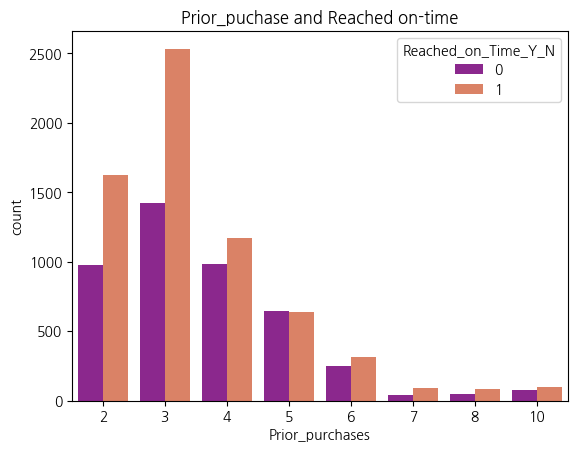

In [19]:
import seaborn as sb
from matplotlib import pyplot as plt
sb.countplot(x = "Prior_purchases", data = train, palette = "plasma",hue="Reached_on_Time_Y_N");
plt.title('Prior_puchase and Reached on-time')
plt.show()

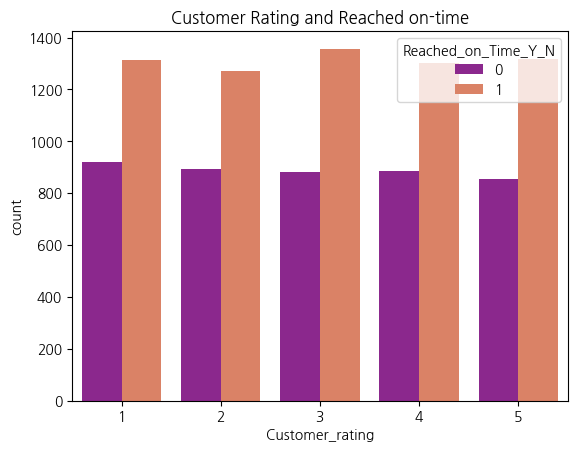

In [20]:
import seaborn as sb
from matplotlib import pyplot as plt
sb.countplot(x = "Customer_rating", data = train, palette = "plasma",hue="Reached_on_Time_Y_N");
plt.title('Customer Rating and Reached on-time')
plt.show()

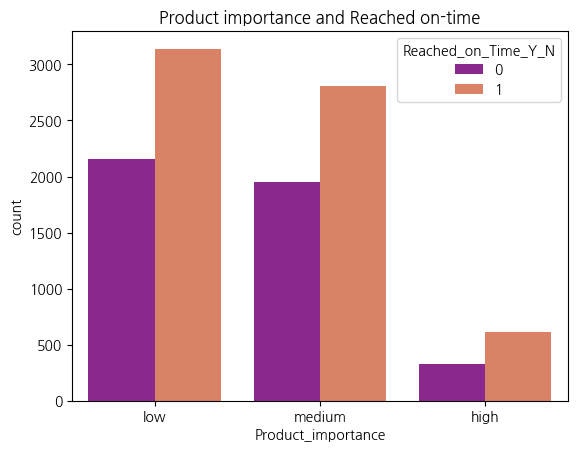

In [21]:
import seaborn as sb
from matplotlib import pyplot as plt
sb.countplot(x = "Product_importance", data = train, palette = "plasma",hue="Reached_on_Time_Y_N");
plt.title('Product importance and Reached on-time')
plt.show()

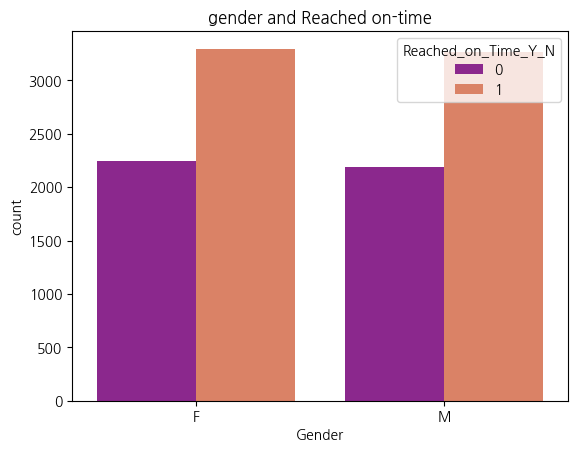

In [22]:
import seaborn as sb
from matplotlib import pyplot as plt
sb.countplot(x = "Gender", data = train, palette = "plasma",hue="Reached_on_Time_Y_N");
plt.title('gender and Reached on-time')
plt.show()

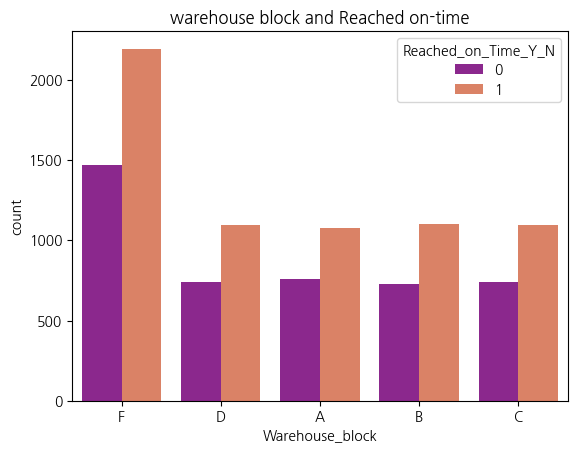

In [23]:
import seaborn as sb
from matplotlib import pyplot as plt
sb.countplot(x = "Warehouse_block", data = train, palette = "plasma",hue="Reached_on_Time_Y_N",order = train['Warehouse_block'].value_counts().index);
plt.title('warehouse block and Reached on-time')
plt.show()

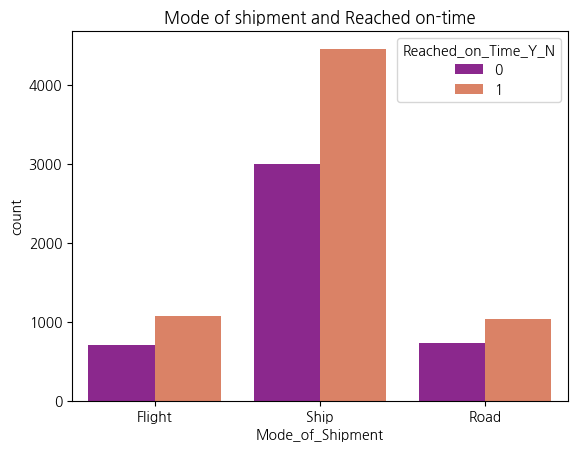

In [24]:
import seaborn as sb
from matplotlib import pyplot as plt
sb.countplot(x = "Mode_of_Shipment", data = train, palette = "plasma",hue="Reached_on_Time_Y_N");
plt.title('Mode of shipment and Reached on-time')
plt.show()

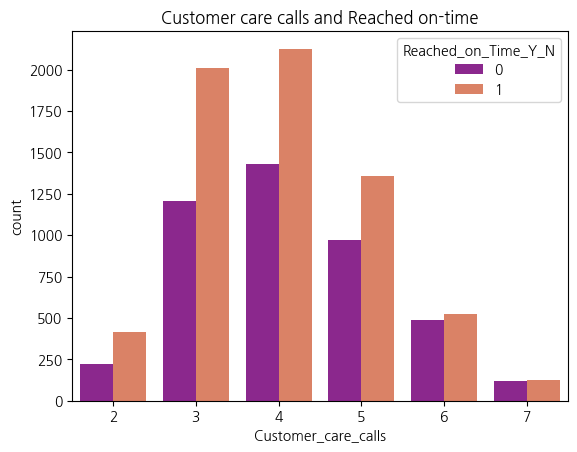

In [25]:
sb.countplot(x = "Customer_care_calls", data = train, palette = "plasma",hue="Reached_on_Time_Y_N");
plt.title('Customer care calls and Reached on-time')
plt.show()

In [26]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached_on_Time_Y_N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB
None


In [27]:
# 데이터 타입별 컬럼 수 확인
dtype_data = train.dtypes.reset_index()
dtype_data.columns = ["Count", "Column Type"]
dtype_data = dtype_data.groupby("Column Type").aggregate('count').reset_index()

print(dtype_data)

  Column Type  Count
0       int64      8
1      object      4


In [28]:
# pandas 의 select_dtypes('object') 사용
train.select_dtypes(include=['object','category']).head()

,Warehouse_block,Mode_of_Shipment,Product_importance,Gender
0,D,Flight,low,F
1,F,Flight,low,M
2,A,Flight,low,M
3,B,Flight,medium,M
4,C,Flight,medium,F


In [30]:
# 범주형 컬럼 유니크한 값 산출
cat_feat = train.select_dtypes('object','category').columns.values
train_cat = train[cat_feat].copy()
print(train_cat.nunique().sort_values())

Gender                2
Mode_of_Shipment      3
Product_importance    3
Warehouse_block       5
dtype: int64


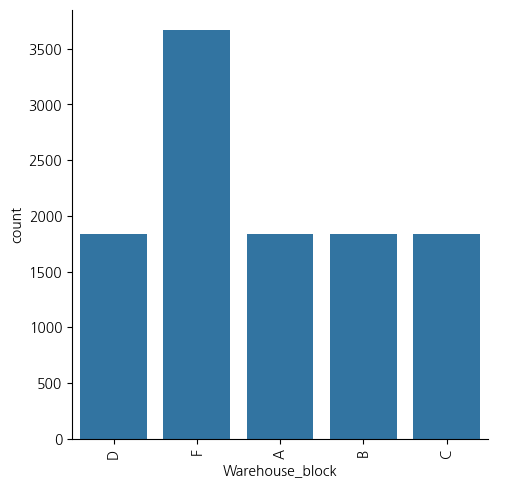

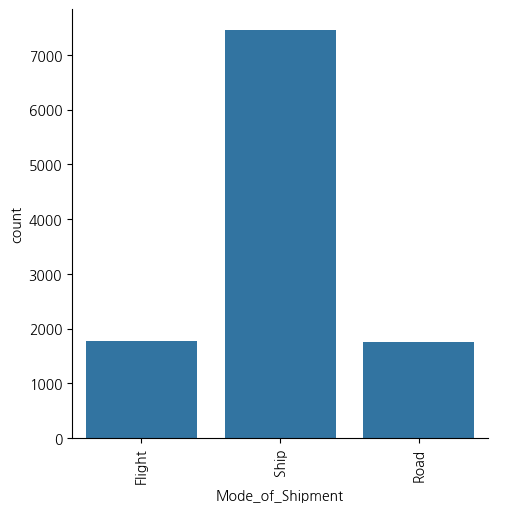

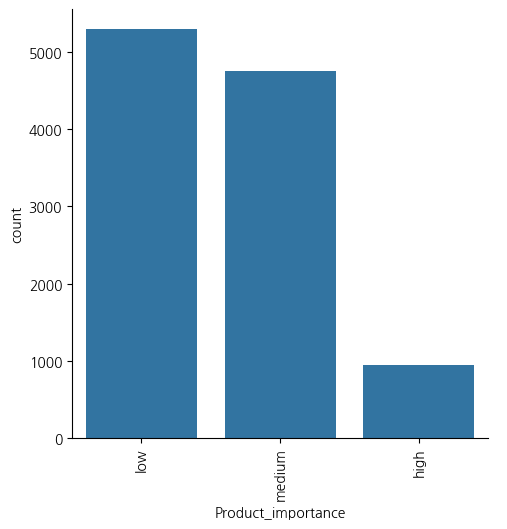

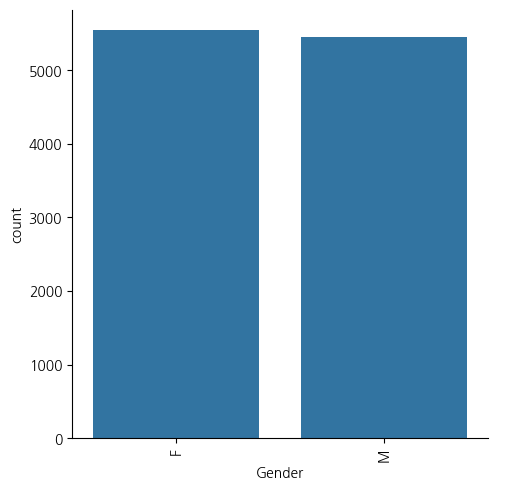

In [31]:
for col in train_cat.columns:
  fig = sns.catplot(x=col, kind="count", data=train_cat, hue=None)
  fig.set_xticklabels(rotation=90)
  plt.show()

### 2.2.1 범주형 자료 Encoding

In [32]:
train_cat_dummies = pd.get_dummies(train_cat)
train_cat_dummies.head(3)

,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Product_importance_high,Product_importance_low,Product_importance_medium,Gender_F,Gender_M
0,0,0,0,1,0,1,0,0,0,1,0,1,0
1,0,0,0,0,1,1,0,0,0,1,0,0,1
2,1,0,0,0,0,1,0,0,0,1,0,0,1


In [33]:
# 수치형 자료
# pandas 의 select_dtypes('number') 사용
train.select_dtypes(include=['number']).head()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached_on_Time_Y_N
0,1,4,2,177,3,44,1233,1
1,2,4,5,216,2,59,3088,1
2,3,2,2,183,4,48,3374,1
3,4,3,3,176,4,10,1177,1
4,5,2,2,184,3,46,2484,1


In [34]:
train.select_dtypes(include=np.number).head()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached_on_Time_Y_N
0,1,4,2,177,3,44,1233,1
1,2,4,5,216,2,59,3088,1
2,3,2,2,183,4,48,3374,1
3,4,3,3,176,4,10,1177,1
4,5,2,2,184,3,46,2484,1


In [35]:
num_feat = train.select_dtypes('number').columns.values
train_num = train[num_feat].copy()

In [36]:
print(train_num.nunique().sort_values())

Reached_on_Time_Y_N        2
Customer_rating            5
Customer_care_calls        6
Prior_purchases            8
Discount_offered          65
Cost_of_the_Product      215
Weight_in_gms           4034
ID                     10999
dtype: int64


In [37]:
print(train.shape)

(10999, 12)


In [38]:
# ID, 범주형 변수 삭제
train_num = train_num.drop(['ID','Reached_on_Time_Y_N'], axis=1, errors='ignore')

### 2.2.2 범주형 자료 상관관계 Feature 정제

In [43]:
from scipy.stats import chi2_contingency
import numpy as np

def cramers_V(var1,var2) :
  crosstab =np.array(pd.crosstab(var1,var2, rownames=None, colnames=None)) # Cross table building
  stat = chi2_contingency(crosstab)[0] # Keeping of the test statistic of the Chi2 test
  obs = np.sum(crosstab) # Number of observations
  mini = min(crosstab.shape)-1 # Take the minimum value between the columns and the rows of the cross table
  return (stat/(obs*mini))

rows= []

for var1 in train_cat_dummies:
  col = []
  for var2 in train_cat_dummies :
    cramers =cramers_V(train_cat_dummies[var1], train_cat_dummies[var2]) # Cramer's V test
    col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V
  rows.append(col)

cramers_results = np.array(rows)
df = pd.DataFrame(cramers_results, columns = train_cat_dummies.columns, index =train_cat_dummies.columns)

np.sum(df > 0.9)

Warehouse_block_A            1
Warehouse_block_B            1
Warehouse_block_C            1
Warehouse_block_D            1
Warehouse_block_F            1
Mode_of_Shipment_Flight      1
Mode_of_Shipment_Road        1
Mode_of_Shipment_Ship        1
Product_importance_high      1
Product_importance_low       1
Product_importance_medium    1
Gender_F                     2
Gender_M                     2
dtype: int64

## 2.2 수치형 자료 EDA

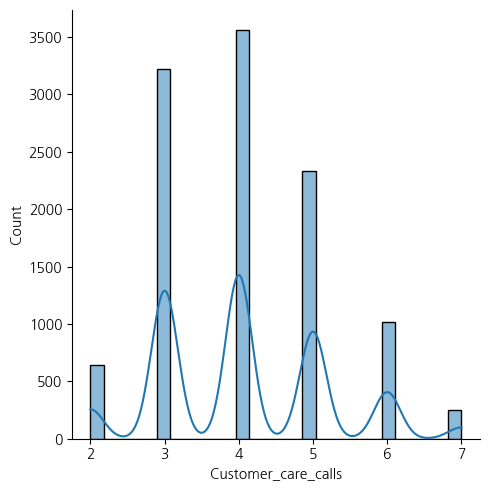

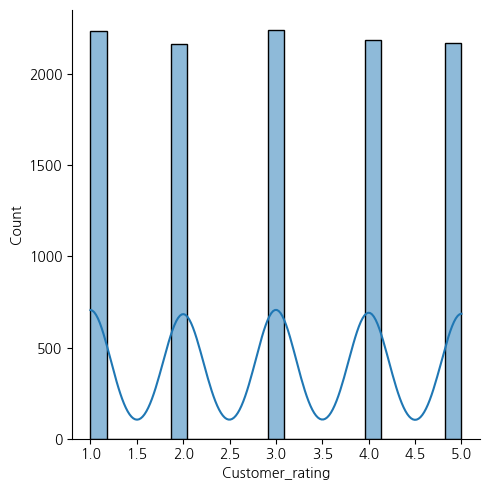

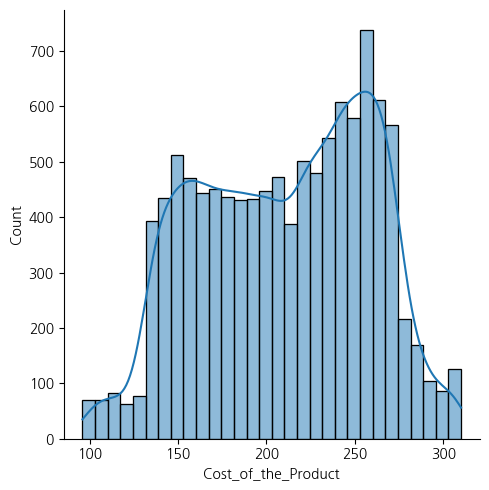

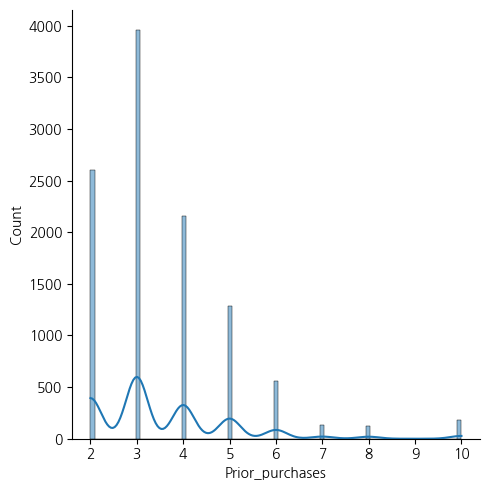

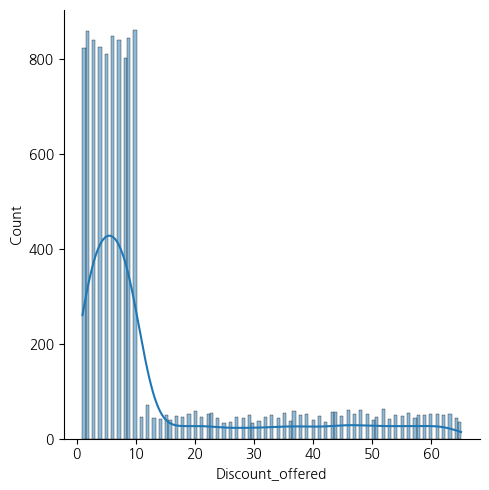

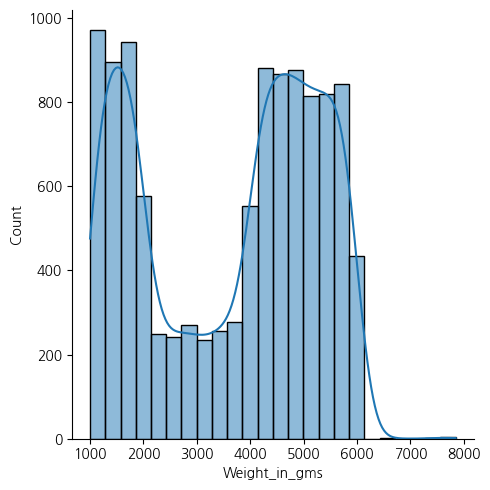

In [ ]:
# 수치형 자료 밀도함수 시각화
col_attrition_num = train_num.columns.values
for i in range(0,len(col_attrition_num)):
    sns.displot(train_num[col_attrition_num[i]],kde=True) # kde : kernel density

In [39]:
train_num.nunique().sort_values()

Customer_rating           5
Customer_care_calls       6
Prior_purchases           8
Discount_offered         65
Cost_of_the_Product     215
Weight_in_gms          4034
dtype: int64

### 2.2.1 수치형 자료 상관관계 Feature 정제

In [40]:
# plotly 안 보이는 문제 해결
import plotly.io as pio
pio.renderers.default = 'colab'
pio.renderers

data = [
    go.Heatmap(
        z=train_num.astype(float).corr().values, # 피어슨 상관계수
        x=train_num.columns.values,
        y=train_num.columns.values,
        colorscale='Viridis',
        reversescale = False,
        opacity = 1.0

    )
]


layout = go.Layout(
    title='숫자형 Feature 들의 피어슨 상관계수',
    xaxis = dict(ticks='', nticks=36),
    yaxis = dict(ticks='' ),
    width = 900, height = 700,

)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='labelled-heatmap')

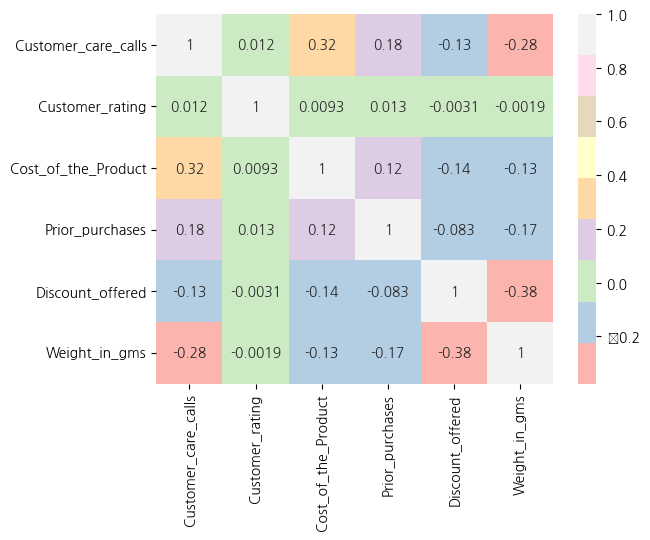

In [42]:
sns.heatmap(train_num.corr(),annot=True,cmap='Pastel1');

# 3.Modeling

## 3.1 Data Set

In [44]:
# Concat the two dataframes together columnwise
train_final = pd.concat([train["Reached_on_Time_Y_N"], train_num, train_cat_dummies], axis=1)

# 목표
target = train["Reached_on_Time_Y_N"]

X=pd.concat([train_num, train_cat_dummies], axis=1)
Y=train["Reached_on_Time_Y_N"]

# Data Split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.30)

## 3.2 Logistic Regression

In [46]:
model = LogisticRegression()
model.fit(X_train, y_train)
lr_predictions = model.predict(X_test)

print("Accuracy score: {}".format(accuracy_score(y_test, lr_predictions)))
print("="*60)
print(classification_report(y_test, lr_predictions))

Accuracy score: 0.6348484848484849
              precision    recall  f1-score   support

           0       0.54      0.58      0.56      1332
           1       0.70      0.67      0.69      1968

    accuracy                           0.63      3300
   macro avg       0.62      0.63      0.62      3300
weighted avg       0.64      0.63      0.64      3300



### 3.2.1 Feature Selection - RFE(Recursive Feature Elimination) 적용
- 모든 Feature들로 부터 Feature를 하나하나 제거하면서 원하는 개수의 feature가 남을 때까지 이를 반복

In [48]:
# Backward
from sklearn.feature_selection import RFE

rfe = RFE(model,n_features_to_select=6)
X_rfe = rfe.fit_transform(X,Y)
model.fit(X_rfe, Y)

print(rfe.support_)
print('')
print(rfe.ranking_)
print('')
print(X.columns[rfe.support_])

# Prior_purchases, Discount_offered, Warehouse_block_A, Product_importance_low, Product_importance_medium, Gender_M 이 6개의 특성이 선택
# 선택된 특성들(Prior_purchases, Discount_offered 등)은 모두 1의 순위

[False False False  True  True False  True False False False False False
 False False False  True  True False  True]

[12  9 13  1  1 14  1  2  8  4  7 10  6 11  3  1  1  5  1]

Index(['Prior_purchases', 'Discount_offered', 'Warehouse_block_A',
       'Product_importance_low', 'Product_importance_medium', 'Gender_M'],
      dtype='object')


### 3.2.2 SelectKBest 적용

In [49]:
X_new = SelectKBest(chi2, k = 6).fit_transform(X, Y)
X_new_train, X_new_test, y_new_train, y_new_test = train_test_split(X_new, Y, test_size = 0.3)
model = LogisticRegression()
model.fit(X_new_train, y_new_train)
lr_predictions = model.predict(X_new_test)

print("Accuracy score: {}".format(accuracy_score(y_new_test, lr_predictions)))
print("="*60)
print(classification_report(y_new_test, lr_predictions))

Accuracy score: 0.639090909090909
              precision    recall  f1-score   support

           0       0.55      0.58      0.56      1328
           1       0.70      0.68      0.69      1972

    accuracy                           0.64      3300
   macro avg       0.63      0.63      0.63      3300
weighted avg       0.64      0.64      0.64      3300



## 3.3 SVM

In [50]:
# 정규화
sc_x = StandardScaler()
X_train_sc = sc_x.fit_transform(X_train)
X_test_sc = sc_x.transform(X_test)

# 모델 생성
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)
clf_predictions = clf.predict(X_test_sc)

# 모델 평가
print("Accuracy score: {}".format(accuracy_score(y_test, clf_predictions.round(), normalize=True)))
print("="*60)
print(classification_report(y_test, clf_predictions))

Accuracy score: 0.5963636363636363
              precision    recall  f1-score   support

           0       0.50      0.03      0.06      1332
           1       0.60      0.98      0.74      1968

    accuracy                           0.60      3300
   macro avg       0.55      0.50      0.40      3300
weighted avg       0.56      0.60      0.47      3300



### 3.3.1 SelectKBest 적용

In [51]:
X_norm = MinMaxScaler().fit_transform(X)
X_new = SelectKBest(chi2, k=6).fit_transform(X_norm, Y)


X_new_train,X_new_test,y_new_train,y_new_test=train_test_split(X_new,Y,
                                               test_size=0.30)

clf = svm.SVC(kernel='linear')
clf.fit(X_new_train,y_new_train)
clf_predictions=clf.predict(X_new_test)

print("Accuracy score: {}".format(accuracy_score(y_new_test, clf_predictions.round(), normalize=True)))
print("="*60)
print(classification_report(y_new_test, clf_predictions))

Accuracy score: 0.656969696969697
              precision    recall  f1-score   support

           0       0.56      0.74      0.64      1346
           1       0.77      0.60      0.67      1954

    accuracy                           0.66      3300
   macro avg       0.66      0.67      0.66      3300
weighted avg       0.68      0.66      0.66      3300



## 3.4 RandomForest

In [52]:
rf = RandomForestRegressor(n_estimators = 20, random_state = 0)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print("Accuracy score: {}".format(accuracy_score(y_test, y_pred.round())))

Accuracy score: 0.6681818181818182


### 3.4.1 Feautre Importance

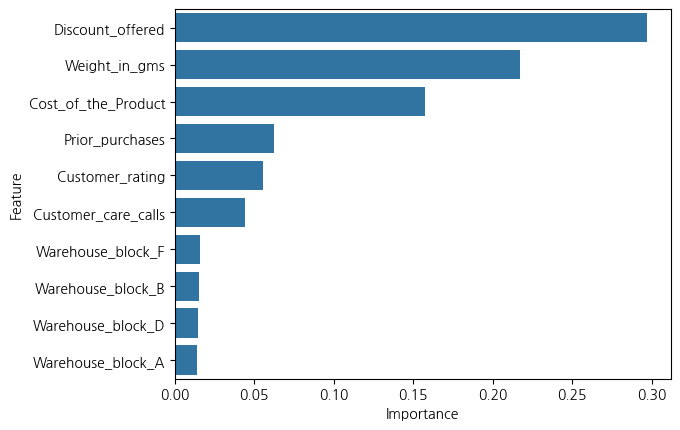

In [53]:
feat = X.columns.values
imp = rf.feature_importances_
df = pd.DataFrame({'Feature': feat, 'Importance': imp})
df = df.sort_values('Importance', ascending=False)[:10]
sns.barplot(x='Importance', y='Feature', data=df);

In [54]:
trace = go.Scatter(
    y = rf.feature_importances_,
    x = X.columns.values,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 13,
        color = rf.feature_importances_,
        colorscale='Portland',
        showscale=True
    ),
    text = X.columns.values
)
data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'Random Forest Feature Importance',
    hovermode= 'closest',
     xaxis= dict(
         ticklen= 5,
         showgrid=False,
        zeroline=False,
        showline=False
     ),
    yaxis=dict(
        title= 'Feature Importance',
        showgrid=False,
        zeroline=False,
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatter2010')

### 3.4.2 RFE

In [55]:
rfe = RFE(rf, n_features_to_select=6)
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,Y)
#Fitting the data to model
rf.fit(X_rfe,Y)

X_new = SelectKBest(chi2, k=6).fit_transform(X, Y)

X_new_train,X_new_test,y_new_train,y_new_test=train_test_split(X_new,Y,
                                               test_size=0.30)

rf = RandomForestRegressor(n_estimators=20, random_state=0)
rf.fit(X_new_train, y_new_train)
y_pred = rf.predict(X_new_test)

print("Accuracy score: {}".format(accuracy_score(y_new_test, y_pred.round())))

Accuracy score: 0.6506060606060606


## 3.5 XGBoost

In [56]:
xgmodel = XGBClassifier()
xgmodel.fit(X_train, y_train)
y_pred = xgmodel.predict(X_test)
print("Accuracy score: {}".format(accuracy_score(y_test, y_pred.round())))

Accuracy score: 0.6475757575757576


### 3.5.1 RFE

In [57]:
# rfe 적용
rfe = RFE(xgmodel, n_features_to_select=6)
X_rfe = rfe.fit_transform(X,Y)
xgmodel.fit(X_rfe,Y)

X_new = SelectKBest(chi2, k=6).fit_transform(X, Y)

X_new_train,X_new_test,y_new_train,y_new_test=train_test_split(X_new,Y,
                                               test_size=0.30)

xgmodel=XGBClassifier()
xgmodel.fit(X_new_train,y_new_train)
y_pred = xgmodel.predict(X_new_test)

print("Accuracy score: {}".format(accuracy_score(y_new_test, y_pred.round())))

Accuracy score: 0.6536363636363637


## 3.6 군집분석

### 3.6.1 K-means Clustering

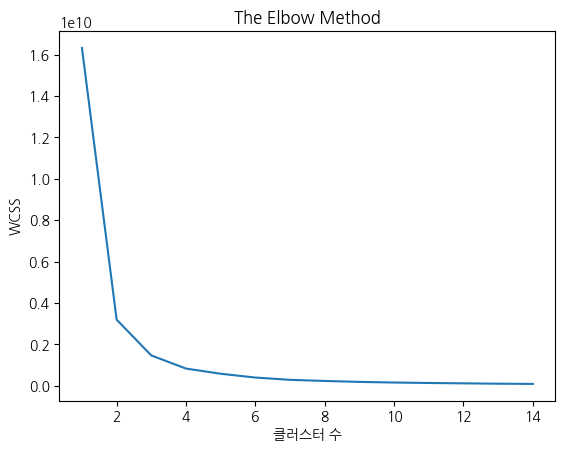

In [58]:
# 정시 배송 안한 곳만
clustdata=train_final[(train_final.Reached_on_Time_Y_N == 1)]

wcss=[]

for i in range(1,15):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(clustdata)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,15), wcss)
plt.title('The Elbow Method')
plt.xlabel('클러스터 수')
plt.ylabel('WCSS')
plt.show()

In [59]:
# 클리스터 수 2개
km = KMeans(n_clusters=2, init='k-means++', n_init=10)
c = km.fit_predict(clustdata)
clustdata["Cluster"]= c

In [60]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(clustdata)

X_normalized = normalize(X_scaled)
X_normalized = pd.DataFrame(X_normalized)

In [61]:
pca = PCA(n_components = 2)
X_principal = pca.fit_transform(X_normalized)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2']
c1 = km.fit_predict(X_principal)

result=pd.DataFrame({'P1' : X_principal.iloc[:,0] ,'P2' : X_principal.iloc[:,1]})
result['Cluster']=pd.Series(c1, index=result.index)
result.head()

,P1,P2,Cluster
0,-0.511924,-0.227381,1
1,-0.314707,0.373856,0
2,-0.002646,0.293600,0
3,-0.107694,0.220379,0
4,-0.194917,-0.367934,1


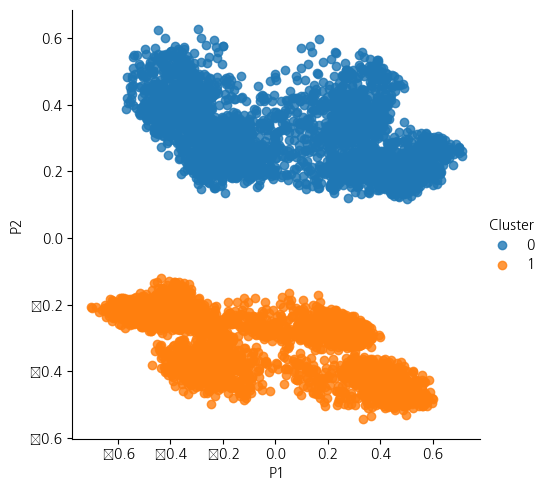

In [62]:
# 시각화
import seaborn as sns
facet = sns.lmplot(data=result,x='P1',y='P2',hue='Cluster',
                   fit_reg=False, legend=True, legend_out=True)

In [63]:
result['Cluster'].value_counts()

1    3296
0    3267
Name: Cluster, dtype: int64

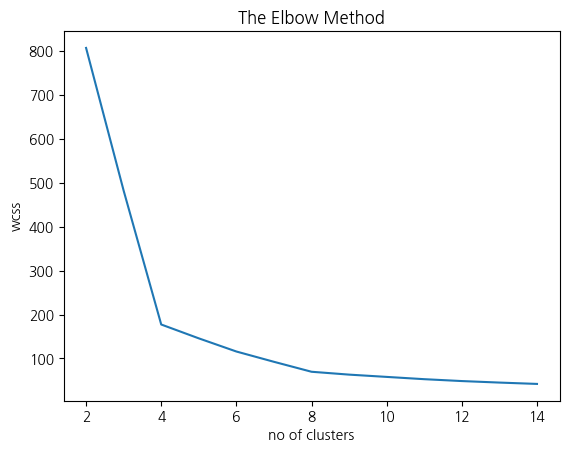

In [64]:
wcss=[]

for i in range(2,15):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(X_principal)
    wcss.append(kmeans.inertia_)

plt.plot(range(2,15), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

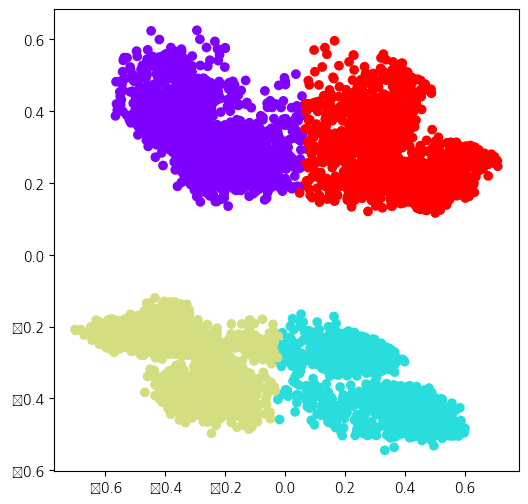

In [65]:
# 클리스터 수 4개
from sklearn.cluster import KMeans
km = KMeans(n_clusters=4, init='k-means++', n_init=10)
c = km.fit_predict(X_principal)
result=pd.DataFrame({'P1' : X_principal.iloc[:,0] ,'P2' : X_principal.iloc[:,1]})
result['Cluster']=pd.Series(c, index=result.index)

# Visualizing the clustering
plt.figure(figsize =(6, 6))
plt.scatter(result.iloc[:,0],result.iloc[:,1],c=result['Cluster'], cmap ='rainbow')
plt.show()